In [1]:
from __future__ import print_function
#import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD, Adam, Adadelta
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import backend as K

Using TensorFlow backend.


In [16]:
batch_size = 128
num_classes = 10
epochs = 40 # experiment with this
learning_rate = 0.01 # experiment with this

# input image dimensions
img_rows, img_cols = 28, 28

In [3]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [4]:
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

y_train shape: (60000,)
y_test shape: (10000,)


In [5]:
# convert class vectors to binary class matrices
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [6]:
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

y_train shape: (60000, 10)
y_test shape: (10000, 10)


In [7]:
# describe the units numbers in each hidden layer
num_units_layer1 = 40
num_units_layer2 = 30
num_units_layer3 = 40
num_units_layer4 = 10

In [21]:
# define the kernel and pooling size
m = 4
n = 2
num_kernels = 5

In [24]:
# the convolutional neural network model is described:
model_cnn = Sequential()
model_cnn.add(Conv2D(num_kernels, kernel_size=(m,m), padding='same',
activation='relu',
input_shape=input_shape))
model_cnn.add(MaxPooling2D(pool_size=(n,n)))

model_cnn.add(Flatten(input_shape=input_shape))
model_cnn.add(Dense(num_units_layer1, activation='relu'))
model_cnn.add(Dense(num_units_layer2, activation='relu'))
model_cnn.add(Dense(num_units_layer3, activation='relu'))
#model_cnn.add(Dense(num_units_layer4, activation='relu'))
model_cnn.add(Dense(num_classes, activation='softmax'))

In [25]:
model_cnn.count_params()

11695

In [26]:
# SGD(lr=learning_rate) Adadelta() Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
# compile the model, choose the optimization objective function, learning rate
opt = Adam(lr=0.004, beta_1=0.9, beta_2=0.999, amsgrad=False)

model_cnn.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
# train the model
history = model_cnn.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test))

Epoch 1/40
469/469 [==============================] - 1s 3ms/step - loss: 0.2914 - accuracy: 0.9074 - val_loss: 0.0961 - val_accuracy: 0.9698
Epoch 2/40
469/469 [==============================] - 1s 3ms/step - loss: 0.0928 - accuracy: 0.9711 - val_loss: 0.0590 - val_accuracy: 0.9816
Epoch 3/40
469/469 [==============================] - 1s 2ms/step - loss: 0.0698 - accuracy: 0.9780 - val_loss: 0.0756 - val_accuracy: 0.9759
Epoch 4/40
469/469 [==============================] - 1s 2ms/step - loss: 0.0600 - accuracy: 0.9807 - val_loss: 0.0714 - val_accuracy: 0.9784
Epoch 5/40
469/469 [==============================] - 1s 2ms/step - loss: 0.0533 - accuracy: 0.9827 - val_loss: 0.0600 - val_accuracy: 0.9821
Epoch 6/40
469/469 [==============================] - 1s 2ms/step - loss: 0.0477 - accuracy: 0.9847 - val_loss: 0.0606 - val_accuracy: 0.9810
Epoch 7/40
469/469 [==============================] - 1s 3ms/step - loss: 0.0434 - accuracy: 0.9861 - val_loss: 0.0500 - val_accuracy: 0.9858
Epoch 

In [27]:
training_loss = history.history['loss']
test_loss = history.history['val_loss']
training_acc = history.history['accuracy']
test_acc = history.history['val_accuracy']

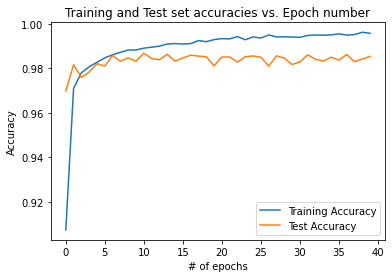

In [28]:
plt.plot(training_acc, label = "Training Accuracy")
plt.plot(test_acc, label = "Test Accuracy")
# naming the x axis 
plt.xlabel('# of epochs') 
# naming the y axis 
plt.ylabel('Accuracy')
# giving a title to my graph 
plt.title('Training and Test set accuracies vs. Epoch number')
# show a legend on the plot 
plt.legend() 
# function to show the plot 
plt.show()

In [420]:
# reporting of the results
score = model_cnn.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.11643907487670795
Test accuracy: 0.9809


In [0]:
del model_cnn